# Examples of Basic Statistics Concepts using Titanic Dataset

In [50]:
# Import math and data manipulation

import numpy as np
import pandas as pd
import math

# import visualization
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset

df = pd.read_csv('./titanic/train.csv')

## Introduction

Knowledge of statistics is essential for data scientists. The following are the examples of applications of statistics for data science:
* Optain the general understanding and description of the data: data types, measurement of general tendency of the data and its dispersion.
* Find out possible outliers in data.
* Find out possible dependencies between different features in dataset.
* Build machine learning models, which use statistical concepts, such as Naive Bayes or Estimation Maximization algorithms.
* Measure statistical significance of the results of the experiments.

In this notebook I would like to introduce some of the statistical concepts and give examples using Titanic dataset. This is how the data looks like:

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Describe the Data

Statistical concepts are widely used to describe what the data is like: types of variables in the dataset and what are the values of the variables.

### 1. Data Types
There are 4 main types of the data:
* __Nominal__: the values fall into predetermined categories and can not be sorted. The following columns are nominal for Titanic dataset: Sex, Embarked, Survived.
* __Ordinal__: the values can be sorted, but there is no scale. Pclass variable is the example of ordinal column.
* __Interval__: the values can be sorted and there is a scale, but there is no zero point for the values (column with a temperature measurements in a dataset could be an example of interval data type). 
* __Ratio__: the values can be sorted, there is a scale and a zero point for the values. The following columns are ratio: Age, SibSp, Parch, Fare.

### 2. Central Tendency of the Data
For interval and ratio data types we can describe th central tandency of the values. Central tendency can be described using the following concepts:
* __Mean__: calculated average of the values.
* __Median__: the middle value.
* __Mode__: the most occuring value. There can be several modes for the variable.

Let's calculate mean, median and mode for the __Age__ values in the dataset:

Find out the mean value:

In [3]:
# calculate mean value manually
df_1 = df.dropna(axis = 0, subset = ['Age']) #remove rows with empty values for Age first
mean_1 = sum(df_1['Age'].values)/len(df_1)
print("The mean value for Age is {mean}".format(mean = mean_1))

The mean value for Age is 29.69911764705882


In [4]:
# calculate mean value using pandas
mean_2 = df['Age'].mean()

print("The mean value for Age is {mean}".format(mean = mean_2))

The mean value for Age is 29.69911764705882


Find out the median value [using this stackoverflow topic to find median manually](https://stackoverflow.com/questions/24101524/finding-median-of-list-in-python):

In [5]:
# calculate median manually

def median(lst):
    quotient, remainder = divmod(len(lst), 2)
    if remainder:
        return sorted(lst)[quotient]
    return sum(sorted(lst)[quotient - 1:quotient + 1]) / 2.

median_1 = median(df_1['Age'].values)

print("The median value for Age is {median}".format(median = median_1))

The median value for Age is 28.0


In [6]:
# calculate median using pandas

median_2 = df['Age'].median()

print("The median value for Age is {median}".format(median = median_2))

The median value for Age is 28.0


Find out the mode values [using this stackoverflow topic to find mode for a list manually](https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list):

In [7]:
# find out mode manually

def mode(arr) :
    m = max([arr.count(a) for a in arr])
    return [x for x in arr if arr.count(x) == m][0] if m>1 else None

mode_1 = mode(df_1['Age'].values.tolist())

print("The mode value for Age is {mode}".format(mode = mode_1))

The mode value for Age is 24.0


In [8]:
# find out mode using pandas

mode_2 = df['Age'].mode()

print("The mode value for Age is {mode} (Taking only 1st discovered mode value.)".format(mode = mode_2[0]))

The mode value for Age is 24.0 (Taking only 1st discovered mode value.)


### 3. Dispertion of the Data

The following terms are used to describe the dispersion of the data:
1. __Range__: minumum and maximum values.
2. __Variance__: the sum of square distances from each point of the data to the mean.
3. __Standard deviation__: the square root of the variance. Standard deviation is widely used because unlike the variance it is expressed in the same units as the values, while the variance is expressed in square units.
4. __Quartiles and Interquartile Range__: The data points can be divided into [quartiles](https://en.wikipedia.org/wiki/Quartile). The 1st quartile (Q1) splits off the lowest 25% of data from the highest 75%, the 2nd quartile (Q2) cuts data set in half and the 3rd quartile (Q3) splits off the highest 25% of data from the lowest 75%. 

So let's calculate range, variance, standard deviation and find out and visualize the quartiles.

Calculation of minimun and maximum values for 'Age' column:

In [9]:
# calculate min and max values using pandas

min_age = df['Age'].min()

max_age = df['Age'].max()

print("The minimum value for Age is {min_age} and maximum value is {max_age}".format(min_age = min_age, max_age = max_age))

The minimum value for Age is 0.42 and maximum value is 80.0


Find out variance:

In [17]:
# calculate variance manually

var_1 = sum((xi - mean_1) ** 2 for xi in df_1['Age'].values.tolist()) / len(df_1['Age'].values.tolist())
    
print("The variance for Age is {var_1}".format(var_1 = var_1))

The variance for Age is 210.7235797536662


In [19]:
# calculate variance using numpy

var_2 = np.var(df_1['Age'].values.tolist())

print("The variance for Age is {var_2}".format(var_2 = var_2))

The variance for Age is 210.72357975366617


Find out standard deviation:

In [27]:
## calculate standard deviation as a square root of variance

stdev_1 = math.sqrt(var_1)

print("The standard deviation for Age is {stdev_1}".format(stdev_1 = stdev_1))

The standard deviation for Age is 14.516321150817317


In [26]:
# calculate standard deviation using pandas

stdev_2 = df['Age'].std()

print("The standard deviation for Age is {stdev_2}".format(stdev_2 = stdev_2))

The standard deviation for Age is 14.526497332334044


We can also find out all this information and quartiles using pandas DataFrame.describe method:

In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4. Visualization of the Data

Calculation of values which describe central tendency and dispertion of the data is very useful for understanding of the data, but these numbers are not very demonstrative.
<br> The best way to understand those values is to visualize the data.

__Bar charts__ are commonly used to visualize nominal data. For example, the following is the bar chart for 'Sex' column:

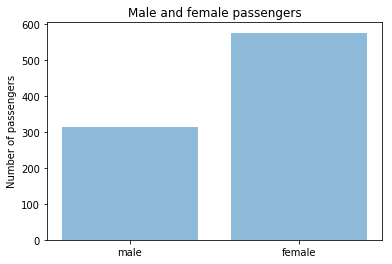

In [40]:
sex = df['Sex'].unique().tolist()
y_pos = np.arange(len(sex))
values = df.groupby(['Sex'])['PassengerId'].count().values.tolist()
 
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, sex)
plt.ylabel('Number of passengers')
plt.title('Male and female passengers')
 
plt.show()

__Histograms__ are used to visualize interval and ratio data. Looking at histograms we can find out the range of the data, how the data points are distributed along the range. See the example of histogram fot 'Age' column:

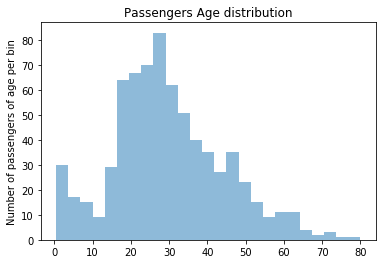

In [44]:
x = df['Age'].values.tolist()
num_bins = 25
n, bins, patches = plt.hist(x, num_bins, alpha=0.5)

plt.ylabel('Number of passengers of age per bin')
plt.title('Passengers Age distribution')

plt.show()

On the histogram we can see:
* 'Age' values span from 0 to 80,
* the most common value for 'Age' lies around 30 years old.

__[Box plots](https://en.wikipedia.org/wiki/Box_plot)__ are used to visualize the main statistical features of the data: mean value, mode and [interquartile range (IQR)](https://en.wikipedia.org/wiki/Interquartile_range). See the example of box plot for the 'Age' column:

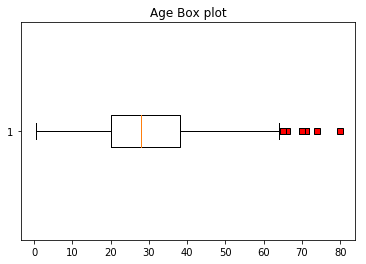

In [47]:
red_square = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots()
ax.set_title('Age Box plot')
ax.boxplot(df_1['Age'].values.tolist(), vert=False, flierprops=red_square)

plt.show()

Box and whisker plots quartiles, and the band inside the box is the second quartile (the median). The ends of whiskers represent the lowest datum still within 1.5 IQR of the lower quartile, and the highest datum still within 1.5 IQR of the upper quartile. Data points outside the whiskers are plotted as small squares.
<br> Data points plotted as small squares are often considered as outliers and removed from the analysis.

## Discover Possible Dependencies

Statistics is used to compare 2 different variables and find correlation between them. Of course, correlation doesn't mean causation, but still correlation may be considered as a sign of possible dependency between 2 variables.
<br>[Covariance](https://en.wikipedia.org/wiki/Covariance) is used to measure correlation, covariance between 2 variable is calculated in following way:</br>
$$cov(X,Y)=1/N*\sum_{i=1}^{N} (x_{i} - \bar X)*(y_{i} - \bar Y)$$
<br> where $$\bar X, \bar Y$$ are the mean values for $$X , Y$$
Random variables whose covariance is z
ero are called uncorrelated.

We can use numpy library to calculate covariance. For example. let's calculate covariance for 'Age' and 'Fare' columns:

In [49]:
cov = np.cov(df_1['Age'].values, df_1['Fare'].values)
print(cov)

[[ 211.01912475   73.84902981]
 [  73.84902981 2800.4130997 ]]


The matrix above shows:
<br> cov(Age, Age)   cov(Age, Fare) </br>

<br> cov(Fare, Age)  cov(Fare, Fare)

[Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is also widely used to find out the correlation between variables. Pearson correlation coefficient is calculated in the following way:
$$ \rho(X, Y) = cov(X, Y) / (\sigma _{X} * \sigma _{Y}) $$
<br> where $$\sigma _{X}, \sigma _{Y}$$ are the standard deviation values for $$X , Y$$

Let's calculate and plot Pearson correlation coefficient using numpy for columns in the dataset and plot them using seaborn heatmap:

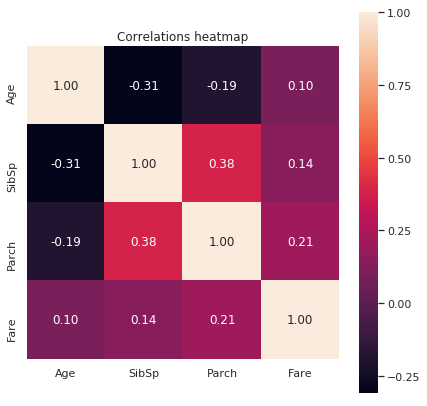

In [53]:
#Numerical columns to find out correlation
cols = ['Age', 'SibSp', 'Parch', 'Fare']

#Find out correlation between columns using numpy and plot
corrs = np.corrcoef(df_1[cols].values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols).set_title('Correlations heatmap')

Pearson correlation coefficient has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.
<br> As we see on our plot there is no strong correlation between numeric variables of the dataset.